<a href="https://colab.research.google.com/github/nishimurakaori/sampleOhtanisan/blob/main/ohtanisan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pybaseball

In [2]:
from pybaseball import statcast

In [9]:
data = statcast(start_dt='2021-05-01', end_dt='2021-05-09')
data.head()

This is a large query, it may take a moment to complete


100%|██████████| 9/9 [00:14<00:00,  1.56s/it]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1637,FF,2021-05-09,92.9,-2.98,5.74,"Rodríguez, Richard",595879,593144,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,3,"Javier Baez grounds out, second baseman Adam F...",R,R,R,CHC,PIT,X,4,ground_ball,3,2,2021,-1.14,1.34,0.42,3.20,<NA>,545121,<NA>,2,9,Bot,147.02,144.11,<NA>,...,7,91.2,-24,93.6,2630,7.0,634237,593144,607732,453943,624428,570481,621028,664789,594694,657011,53.55,0.08,0.072,0.0,1,0,0,2,78,8,4-Seam Fastball,5,6,5,6,6,5,5,6,Standard,Standard,223,-0.142,-0.345
1702,FF,2021-05-09,91.8,-2.95,5.72,"Rodríguez, Richard",595879,593144,NaN,foul,<NA>,<NA>,<NA>,<NA>,11,"Javier Baez grounds out, second baseman Adam F...",R,R,R,CHC,PIT,S,<NA>,NaN,3,2,2021,-1.19,1.43,-0.58,3.50,<NA>,545121,<NA>,2,9,Bot,NaN,NaN,<NA>,...,89,77.1,79,92.4,2567,7.1,634237,593144,607732,453943,624428,570481,621028,664789,594694,657011,53.42,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,78,7,4-Seam Fastball,5,6,5,6,6,5,5,6,Standard,Standard,227,-0.142,0.000
1725,FF,2021-05-09,93.3,-2.95,5.67,"Rodríguez, Richard",595879,593144,NaN,foul,<NA>,<NA>,<NA>,<NA>,3,"Javier Baez grounds out, second baseman Adam F...",R,R,R,CHC,PIT,S,<NA>,NaN,3,2,2021,-1.36,1.27,0.36,3.24,<NA>,545121,<NA>,2,9,Bot,NaN,NaN,<NA>,...,284,97.8,20,95.3,2713,7.2,634237,593144,607732,453943,624428,570481,621028,664789,594694,657011,53.32,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,78,6,4-Seam Fastball,5,6,5,6,6,5,5,6,Standard,Standard,220,-0.142,0.000
1781,FF,2021-05-09,93.0,-2.67,5.85,"Rodríguez, Richard",595879,593144,NaN,ball,<NA>,<NA>,<NA>,<NA>,12,"Javier Baez grounds out, second baseman Adam F...",R,R,R,CHC,PIT,B,<NA>,NaN,2,2,2021,-1.53,1.46,0.35,3.72,<NA>,545121,<NA>,2,9,Bot,NaN,NaN,<NA>,...,<NA>,NaN,<NA>,94.1,2695,6.9,634237,593144,607732,453943,624428,570481,621028,664789,594694,657011,53.58,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,78,5,4-Seam Fastball,5,6,5,6,6,5,5,6,Standard,Standard,222,-0.142,0.048
1857,SL,2021-05-09,81.3,-2.83,5.73,"Rodríguez, Richard",595879,593144,NaN,blocked_ball,<NA>,<NA>,<NA>,<NA>,14,"Javier Baez grounds out, second baseman Adam F...",R,R,R,CHC,PIT,B,<NA>,NaN,1,2,2021,0.41,-0.05,2.41,-0.23,<NA>,545121,<NA>,2,9,Bot,NaN,NaN,<NA>,...,<NA>,NaN,<NA>,81.8,2694,7.1,634237,593144,607732,453943,624428,570481,621028,664789,594694,657011,53.44,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,78,4,Slider,5,6,5,6,6,5,5,6,Standard,Standard,21,-0.142,0.074


In [4]:
# Find Ohtanisan's player id
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
playerid_lookup('ohtani','shohei')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,ohtani,shohei,660271,ohtas001,ohtansh01,19755,2018.0,2021.0


In [6]:
# His MLBAM ID is 660271, so we feed that as the player_id argument to the following function
ohtani_stats = statcast_pitcher('2021-05-01', '2021-05-09', 660271)
ohtani_stats.head()

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-05-05,93.9,-2.08,6.00,"Ohtani, Shohei",621563,660271,walk,ball,NaN,NaN,NaN,NaN,11,Joey Wendle walks. Yandy Diaz to 2nd.,R,L,R,LAA,TB,B,NaN,NaN,3,0,2021,-0.17,1.39,-1.05,3.96,NaN,NaN,650490.0,0,6,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,95.0,2299,6.9,634281,660271,435559,665120,664058,670351,578428,501571,545361,621493,53.62,NaN,NaN,0.7,1.0,0.0,0.0,NaN,45,4,4-Seam Fastball,1,0,0,1,0,1,0,1,Standard,Standard,204,-0.087,0.177
1,FF,2021-05-05,92.0,-2.22,6.02,"Ohtani, Shohei",621563,660271,NaN,ball,NaN,NaN,NaN,NaN,11,Joey Wendle walks. Yandy Diaz to 2nd.,R,L,R,LAA,TB,B,NaN,NaN,2,0,2021,-0.04,1.32,-0.51,4.40,NaN,NaN,650490.0,0,6,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,92.9,2244,6.9,634281,660271,435559,665120,664058,670351,578428,501571,545361,621493,53.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,3,4-Seam Fastball,1,0,0,1,0,1,0,1,Standard,Standard,205,0.000,0.248
2,FF,2021-05-05,94.7,-2.41,5.97,"Ohtani, Shohei",621563,660271,NaN,ball,NaN,NaN,NaN,NaN,11,Joey Wendle walks. Yandy Diaz to 2nd.,R,L,R,LAA,TB,B,NaN,NaN,1,0,2021,-0.33,1.34,-1.00,3.07,NaN,NaN,650490.0,0,6,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,95.6,2351,6.9,634281,660271,435559,665120,664058,670351,578428,501571,545361,621493,53.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,2,4-Seam Fastball,1,0,0,1,0,1,0,1,Standard,Standard,214,0.000,0.114
3,FF,2021-05-05,94.9,-2.19,5.96,"Ohtani, Shohei",621563,660271,NaN,ball,NaN,NaN,NaN,NaN,11,Joey Wendle walks. Yandy Diaz to 2nd.,R,L,R,LAA,TB,B,NaN,NaN,0,0,2021,-0.32,1.31,-0.68,3.49,NaN,NaN,650490.0,0,6,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,95.8,2335,6.8,634281,660271,435559,665120,664058,670351,578428,501571,545361,621493,53.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,1,4-Seam Fastball,1,0,0,1,0,1,0,1,Standard,Standard,201,0.000,0.046
4,FF,2021-05-05,95.4,-2.26,6.01,"Ohtani, Shohei",650490,660271,walk,ball,NaN,NaN,NaN,NaN,11,Yandy Diaz walks.,R,R,R,LAA,TB,B,NaN,NaN,3,1,2021,-0.47,1.09,-2.48,3.47,NaN,NaN,NaN,0,6,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,96.5,2259,6.8,634281,660271,435559,665120,664058,670351,578428,501571,545361,621493,53.66,NaN,NaN,0.7,1.0,0.0,0.0,NaN,44,5,4-Seam Fastball,1,0,0,1,0,1,0,1,Standard,Standard,211,-0.060,0.231


In [8]:
# Batting Stats
from pybaseball import batting_stats_range
data = batting_stats_range('2021-05-01', '2021-05-09')
data.head()


,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
1,José Abreu,34,0,MLB-AL,Chicago,7,31,24,4,6,3,0,1,7,3,0,10,3,0,1,0,0,0,0.250,0.387,0.500,0.887
2,Ronald Acuna Jr.,23,0,MLB-NL,Atlanta,8,35,30,5,6,1,0,2,4,3,1,5,1,0,1,0,3,1,0.200,0.286,0.433,0.719
3,Willy Adames,25,0,MLB-AL,Tampa Bay,8,29,28,4,7,1,0,2,4,1,0,13,0,0,0,0,0,0,0.250,0.276,0.500,0.776
4,Matt Adams,32,0,MLB-NL,Colorado,7,15,13,1,2,0,0,0,0,2,0,4,0,0,0,0,0,0,0.154,0.267,0.154,0.421
5,Ehire Adrianza,31,0,MLB-NL,Atlanta,5,10,9,1,4,0,0,0,3,1,0,1,0,0,0,0,0,0,0.444,0.500,0.444,0.944


In [15]:
from pybaseball import statcast
data = statcast('2021-05-06', '2021-05-06', team='LAA')
data.head()

This is a large query, it may take a moment to complete


100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
92,SL,2021-05-06,77.8,-3.41,4.23,"Cishek, Steve",621563,518553,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,6,"Joey Wendle grounds out, second baseman David ...",R,L,R,LAA,TB,X,4,ground_ball,0,2,2021,1.31,-0.33,0.62,2.52,<NA>,<NA>,670712,2,9,Top,161.03,148.45,<NA>,...,35,97.4,-2,79.3,2467,7.5,634247,518553,667674,665120,664058,594838,578428,501571,545361,621493,52.98,0.334,0.303,0.0,1,0,0,2,72,3,Slider,3,8,8,3,8,3,8,3,Infield shift,Standard,71,0.001,-0.123
93,FF,2021-05-06,90.0,-3.43,4.25,"Cishek, Steve",621563,518553,NaN,foul,<NA>,<NA>,<NA>,<NA>,3,"Joey Wendle grounds out, second baseman David ...",R,L,R,LAA,TB,S,<NA>,NaN,0,1,2021,-1.06,0.75,0.40,2.92,<NA>,<NA>,670712,2,9,Top,NaN,NaN,<NA>,...,231,80.4,49,91.9,2492,7.3,634247,518553,667674,665120,664058,594838,578428,501571,545361,621493,53.19,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,72,2,4-Seam Fastball,3,8,8,3,8,3,8,3,Infield shift,Standard,240,0.000,-0.056
97,SL,2021-05-06,78.1,-3.39,4.18,"Cishek, Steve",621563,518553,NaN,swinging_strike,<NA>,<NA>,<NA>,<NA>,14,"Joey Wendle grounds out, second baseman David ...",R,L,R,LAA,TB,S,<NA>,NaN,0,0,2021,1.23,-0.40,1.49,2.37,<NA>,<NA>,670712,2,9,Top,NaN,NaN,<NA>,...,<NA>,NaN,<NA>,79.7,2414,7.6,634247,518553,667674,665120,664058,594838,578428,501571,545361,621493,52.86,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,72,1,Slider,3,8,8,3,8,3,8,3,Infield shift,Standard,71,0.000,-0.044
100,SI,2021-05-06,89.0,-3.41,4.16,"Cishek, Steve",670712,518553,field_error,hit_into_play,<NA>,<NA>,<NA>,<NA>,7,Mike Brosseau reaches on a fielding error by t...,R,R,R,LAA,TB,X,5,ground_ball,3,2,2021,-1.39,0.73,-0.32,1.74,<NA>,<NA>,<NA>,2,9,Top,89.46,161.19,<NA>,...,20,88.2,-4,91.3,2359,7.7,634247,518553,667674,665120,664058,594838,578428,501571,545361,621493,52.83,0.223,0.201,0.9,1,0,0,2,71,6,Sinker,3,8,8,3,8,3,8,3,Standard,Standard,235,0.000,0.123
104,SL,2021-05-06,75.6,-3.58,4.17,"Cishek, Steve",670712,518553,NaN,ball,<NA>,<NA>,<NA>,<NA>,13,Mike Brosseau reaches on a fielding error by t...,R,R,R,LAA,TB,B,<NA>,NaN,2,2,2021,1.32,-0.36,-1.62,1.59,<NA>,<NA>,<NA>,2,9,Top,NaN,NaN,<NA>,...,<NA>,NaN,<NA>,76.7,2373,7.3,634247,518553,667674,665120,664058,594838,578428,501571,545361,621493,53.16,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,71,5,Slider,3,8,8,3,8,3,8,3,Standard,Standard,75,0.000,0.036


Gathering Player Data


/usr/local/lib/python3.7/dist-packages/pybaseball/plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


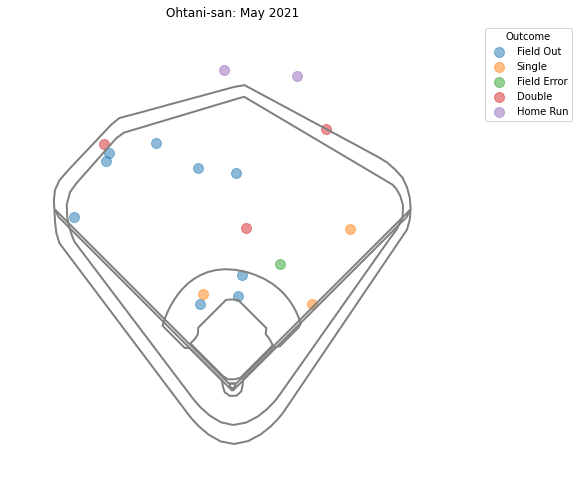

In [17]:
from pybaseball import statcast_batter, spraychart
data = statcast_batter('2021-05-01', '2021-05-09', 660271)
sub_data = data[data['home_team'] == 'LAA']
spraychart(sub_data, 'angels', title='Ohtani-san: May 2021')